In [61]:
import numpy as n 
import pandas as p 
import seaborn as s 
import matplotlib.pyplot as m 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [62]:
print("numpy",n.__version__)
print("pandas",p.__version__)
print("sklearn",sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
sklearn 1.5.1


## Data Overview:-

In [63]:
df=p.read_csv('Customer_Segmentation.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [64]:
df.shape

(8068, 11)

In [65]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


## Data Wrangling:-

In [67]:
df.drop(['ID','Var_1','Segmentation'],axis=1,inplace=True)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [68]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

<Axes: >

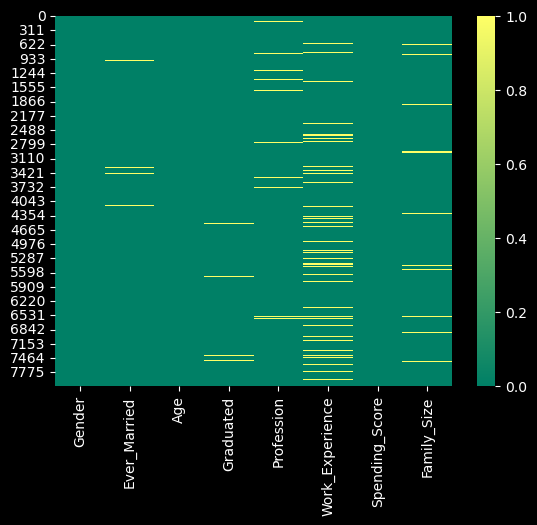

In [69]:
s.heatmap(df.isnull(),cmap='summer')

In [70]:
categorical_columns=['Gender','Ever_Married','Graduated','Profession','Spending_Score']
encoder=LabelEncoder()
for col in categorical_columns: 
    df[col]=encoder.fit_transform(df[col])
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,1,38,1,2,NaN,0,3.0
2,0,1,67,1,2,1.0,2,1.0
3,1,1,67,1,7,0.0,1,2.0
4,0,1,40,1,3,NaN,1,6.0
...,...,...,...,...,...,...,...,...
8063,1,0,22,0,9,0.0,2,7.0
8064,1,0,35,0,4,3.0,2,4.0
8065,0,0,33,1,5,1.0,2,1.0
8066,0,0,27,1,5,1.0,2,4.0


In [71]:
numeric_columns=['Age','Work_Experience','Family_Size']
for col in numeric_columns: 
    df[col].fillna(n.round(df[col].mean(),0),inplace=True) 
categorical_columns=['Gender','Ever_Married','Graduated','Profession','Spending_Score']
for col in categorical_columns: 
    df[col].fillna(df[col].mode()[0],inplace=True)
df                  

C:\Users\samee\AppData\Local\Temp\ipykernel_10032\4120495036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(n.round(df[col].mean(),0),inplace=True)
C:\Users\samee\AppData\Local\Temp\ipykernel_10032\4120495036.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,1,38,1,2,3.0,0,3.0
2,0,1,67,1,2,1.0,2,1.0
3,1,1,67,1,7,0.0,1,2.0
4,0,1,40,1,3,3.0,1,6.0
...,...,...,...,...,...,...,...,...
8063,1,0,22,0,9,0.0,2,7.0
8064,1,0,35,0,4,3.0,2,4.0
8065,0,0,33,1,5,1.0,2,1.0
8066,0,0,27,1,5,1.0,2,4.0


In [72]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

<Axes: >

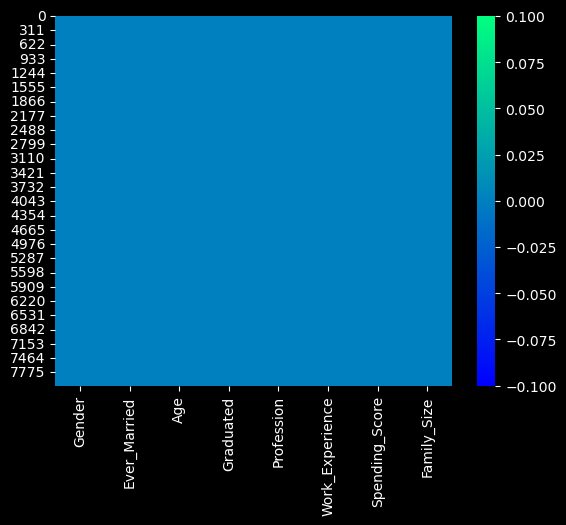

In [73]:
s.heatmap(df.isnull(),cmap='winter')

## Data Analysis/Visualisation:-

C:\Users\samee\AppData\Local\Temp\ipykernel_10032\4206327395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.countplot(data=df,x='Gender',palette=['green','blue'],ax=axes[1,1])
C:\Users\samee\AppData\Local\Temp\ipykernel_10032\4206327395.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.countplot(data=df,x='Ever_Married',palette=['orange','pink','green'],ax=axes[2,0])
C:\Users\samee\AppData\Local\Temp\ipykernel_10032\4206327395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.countplot(data=df,x='Graduated',palette=['orange','grey','green'],ax=axes[2,1])
C:\Us

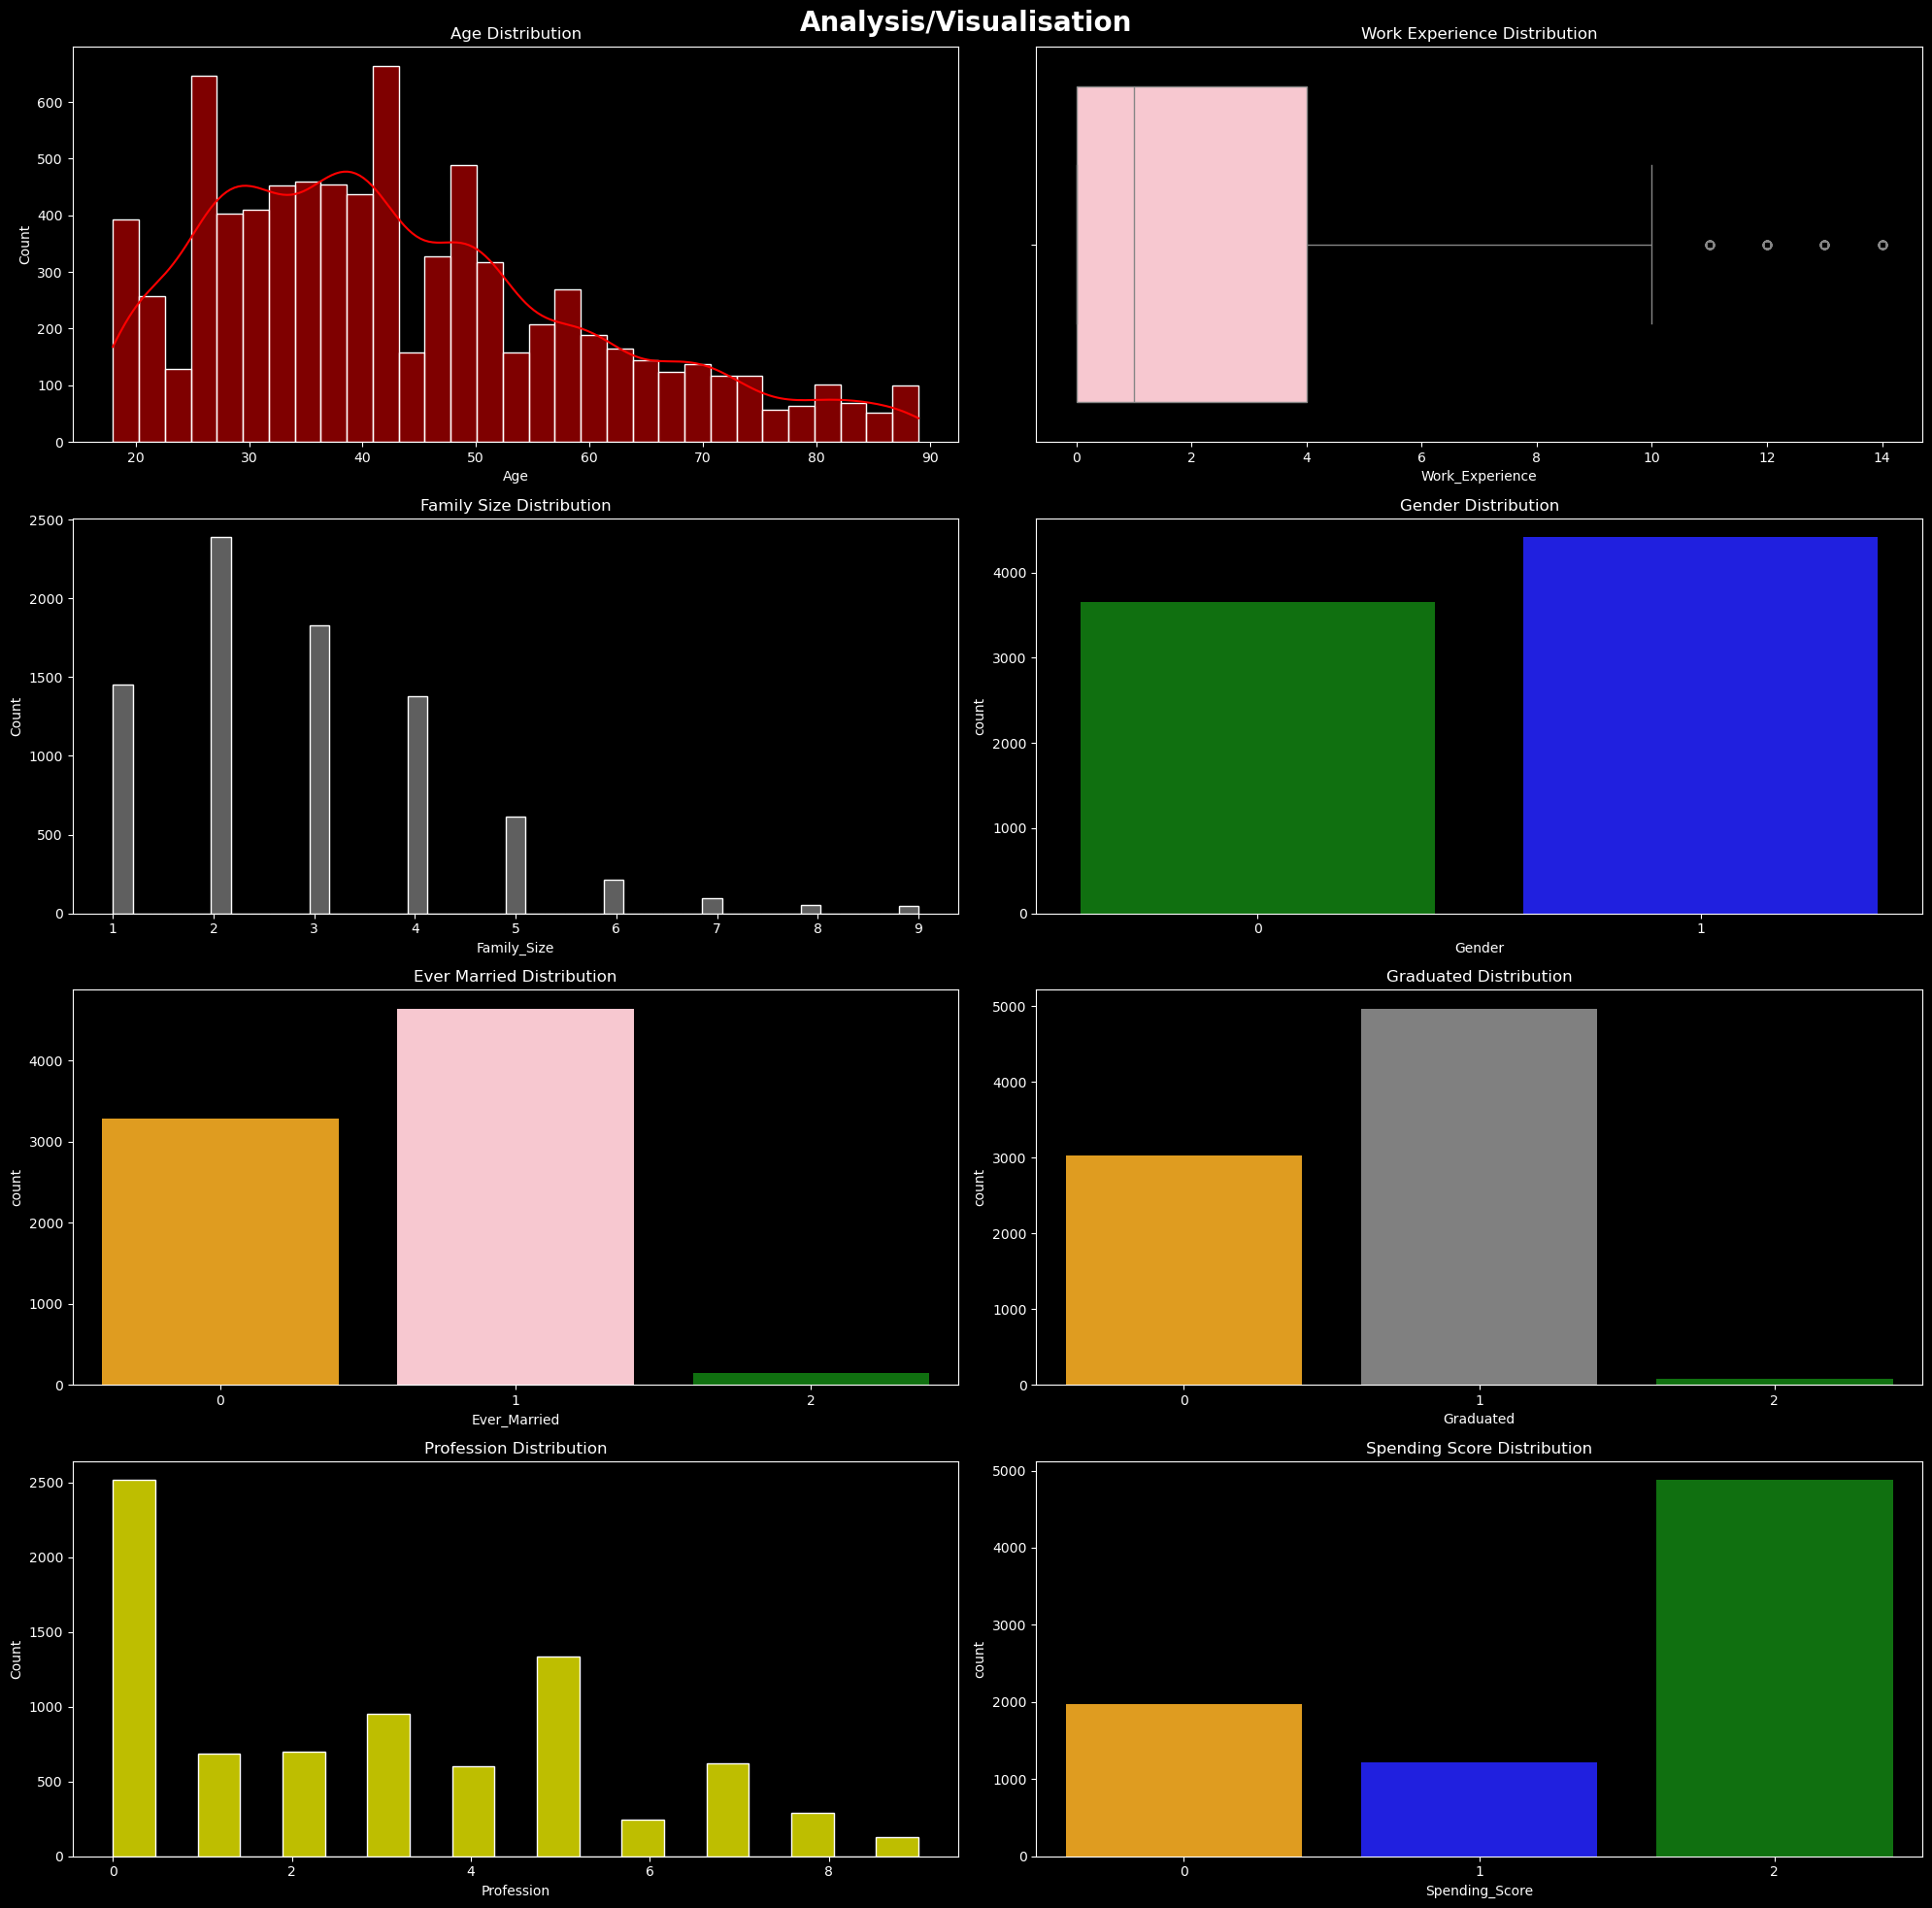

In [74]:
fig,axes=m.subplots(4,2,figsize=(20,20))
m.suptitle("Analysis/Visualisation",fontsize=20,fontweight='bold')
s.histplot(data=df,x='Age',color='red',kde=True,ax=axes[0,0])
axes[0,0].set_title('Age Distribution')
s.boxplot(data=df,x='Work_Experience',color='pink',ax=axes[0,1])
axes[0,1].set_title('Work Experience Distribution')
s.histplot(data=df,x='Family_Size',color='grey',ax=axes[1,0])
axes[1,0].set_title('Family Size Distribution')
s.countplot(data=df,x='Gender',palette=['green','blue'],ax=axes[1,1])
axes[1,1].set_title('Gender Distribution')
s.countplot(data=df,x='Ever_Married',palette=['orange','pink','green'],ax=axes[2,0])
axes[2,0].set_title('Ever Married Distribution')
s.countplot(data=df,x='Graduated',palette=['orange','grey','green'],ax=axes[2,1])
axes[2,1].set_title('Graduated Distribution')
s.histplot(data=df,x='Profession',color='yellow',ax=axes[3,0])
axes[3,0].set_title('Profession Distribution')
s.countplot(data=df,x='Spending_Score',palette=['orange','blue','green'],ax=axes[3,1])
axes[3,1].set_title('Spending Score Distribution')
m.tight_layout()
m.show()

In [75]:
numeric_columns=['Age','Work_Experience','Family_Size']
scaler = StandardScaler()
x_scaled=scaler.fit_transform(df[numeric_columns])
x_scaled

array([[-1.28462344, -0.51987856,  0.76269849],
       [-0.32715082,  0.09958389,  0.09580227],
       [ 1.40826831, -0.51987856, -1.23799017],
       ...,
       [-0.62636101, -0.51987856, -1.23799017],
       [-0.98541324, -0.51987856,  0.76269849],
       [-0.38699286, -0.82960978,  0.09580227]])

## Elbow Method:-

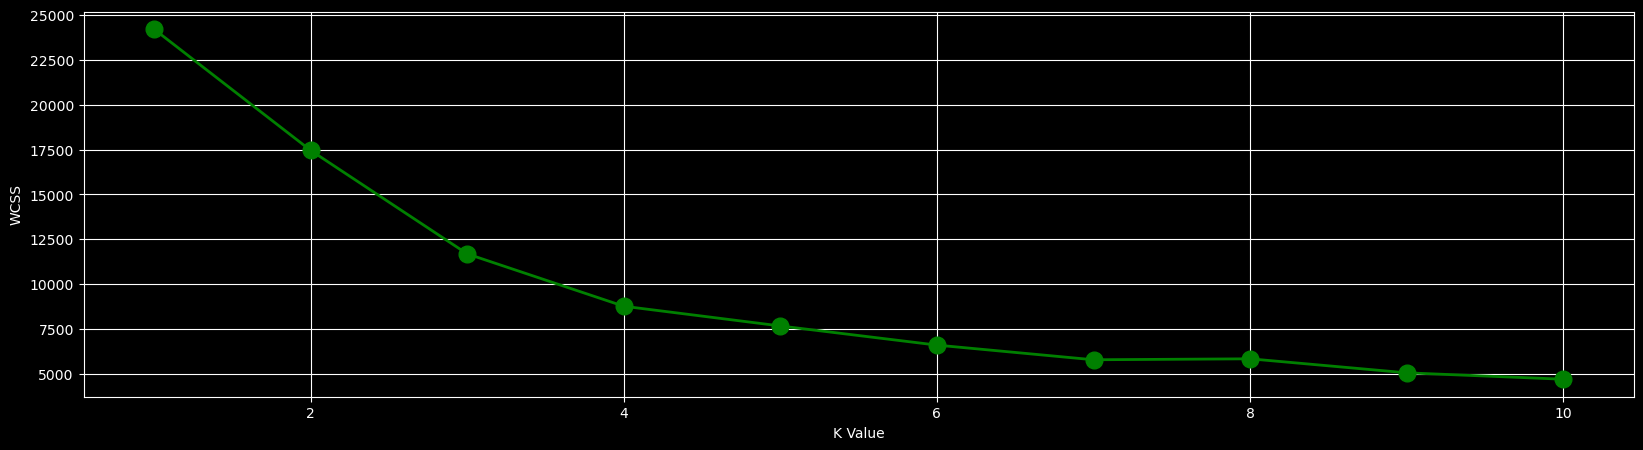

In [76]:
#numeric_columns=['Age','Work_Experience','Family_Size']
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    #kmeans.fit(df[numeric_columns])
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
m.figure(figsize=(20,5))
m.grid()
m.plot(range(1,11),wcss,'go-',linewidth=2,markersize=12)
m.xlabel('K Value')
m.ylabel('WCSS')
m.show()

## Model Evaluation:-

In [77]:
#numeric_columns=['Age','Work_Experience','Family_Size']
kmeans=KMeans(n_clusters=5)
#kmeans.fit(df[numeric_columns])
kmeans.fit(x_scaled)
df['Cluster']=kmeans.labels_
print(df['Cluster'].value_counts())
df.head()

Cluster
0    2569
3    1535
1    1438
2    1269
4    1257
Name: count, dtype: int64


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,1,0,22,0,5,1.0,2,4.0,2
1,0,1,38,1,2,3.0,0,3.0,0
2,0,1,67,1,2,1.0,2,1.0,1
3,1,1,67,1,7,0.0,1,2.0,1
4,0,1,40,1,3,3.0,1,6.0,2


In [78]:
print(kmeans.cluster_centers_)

[[-0.47635884 -0.42957051 -0.52189669]
 [ 1.57044106 -0.46258474 -0.69306454]
 [-0.89152396 -0.31290293  1.47846891]
 [-0.36116794  1.78473172 -0.2432975 ]
 [ 0.51186768 -0.45450446  0.65673316]]


## Cluster Characteristics:-

C:\Users\samee\AppData\Local\Temp\ipykernel_10032\3362194186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.boxplot(data=df,x='Cluster',y='Age',palette=['orange','blue','green','red','yellow'],ax=axes[0,0])
C:\Users\samee\AppData\Local\Temp\ipykernel_10032\3362194186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.boxplot(data=df,x='Cluster',y='Work_Experience',palette=['orange','blue','green','red','yellow'],ax=axes[1,0])
C:\Users\samee\AppData\Local\Temp\ipykernel_10032\3362194186.py:9: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  s.countplot(data=df,x='Cluster',hue='Family_Size',palette=['blue','orange','green','re

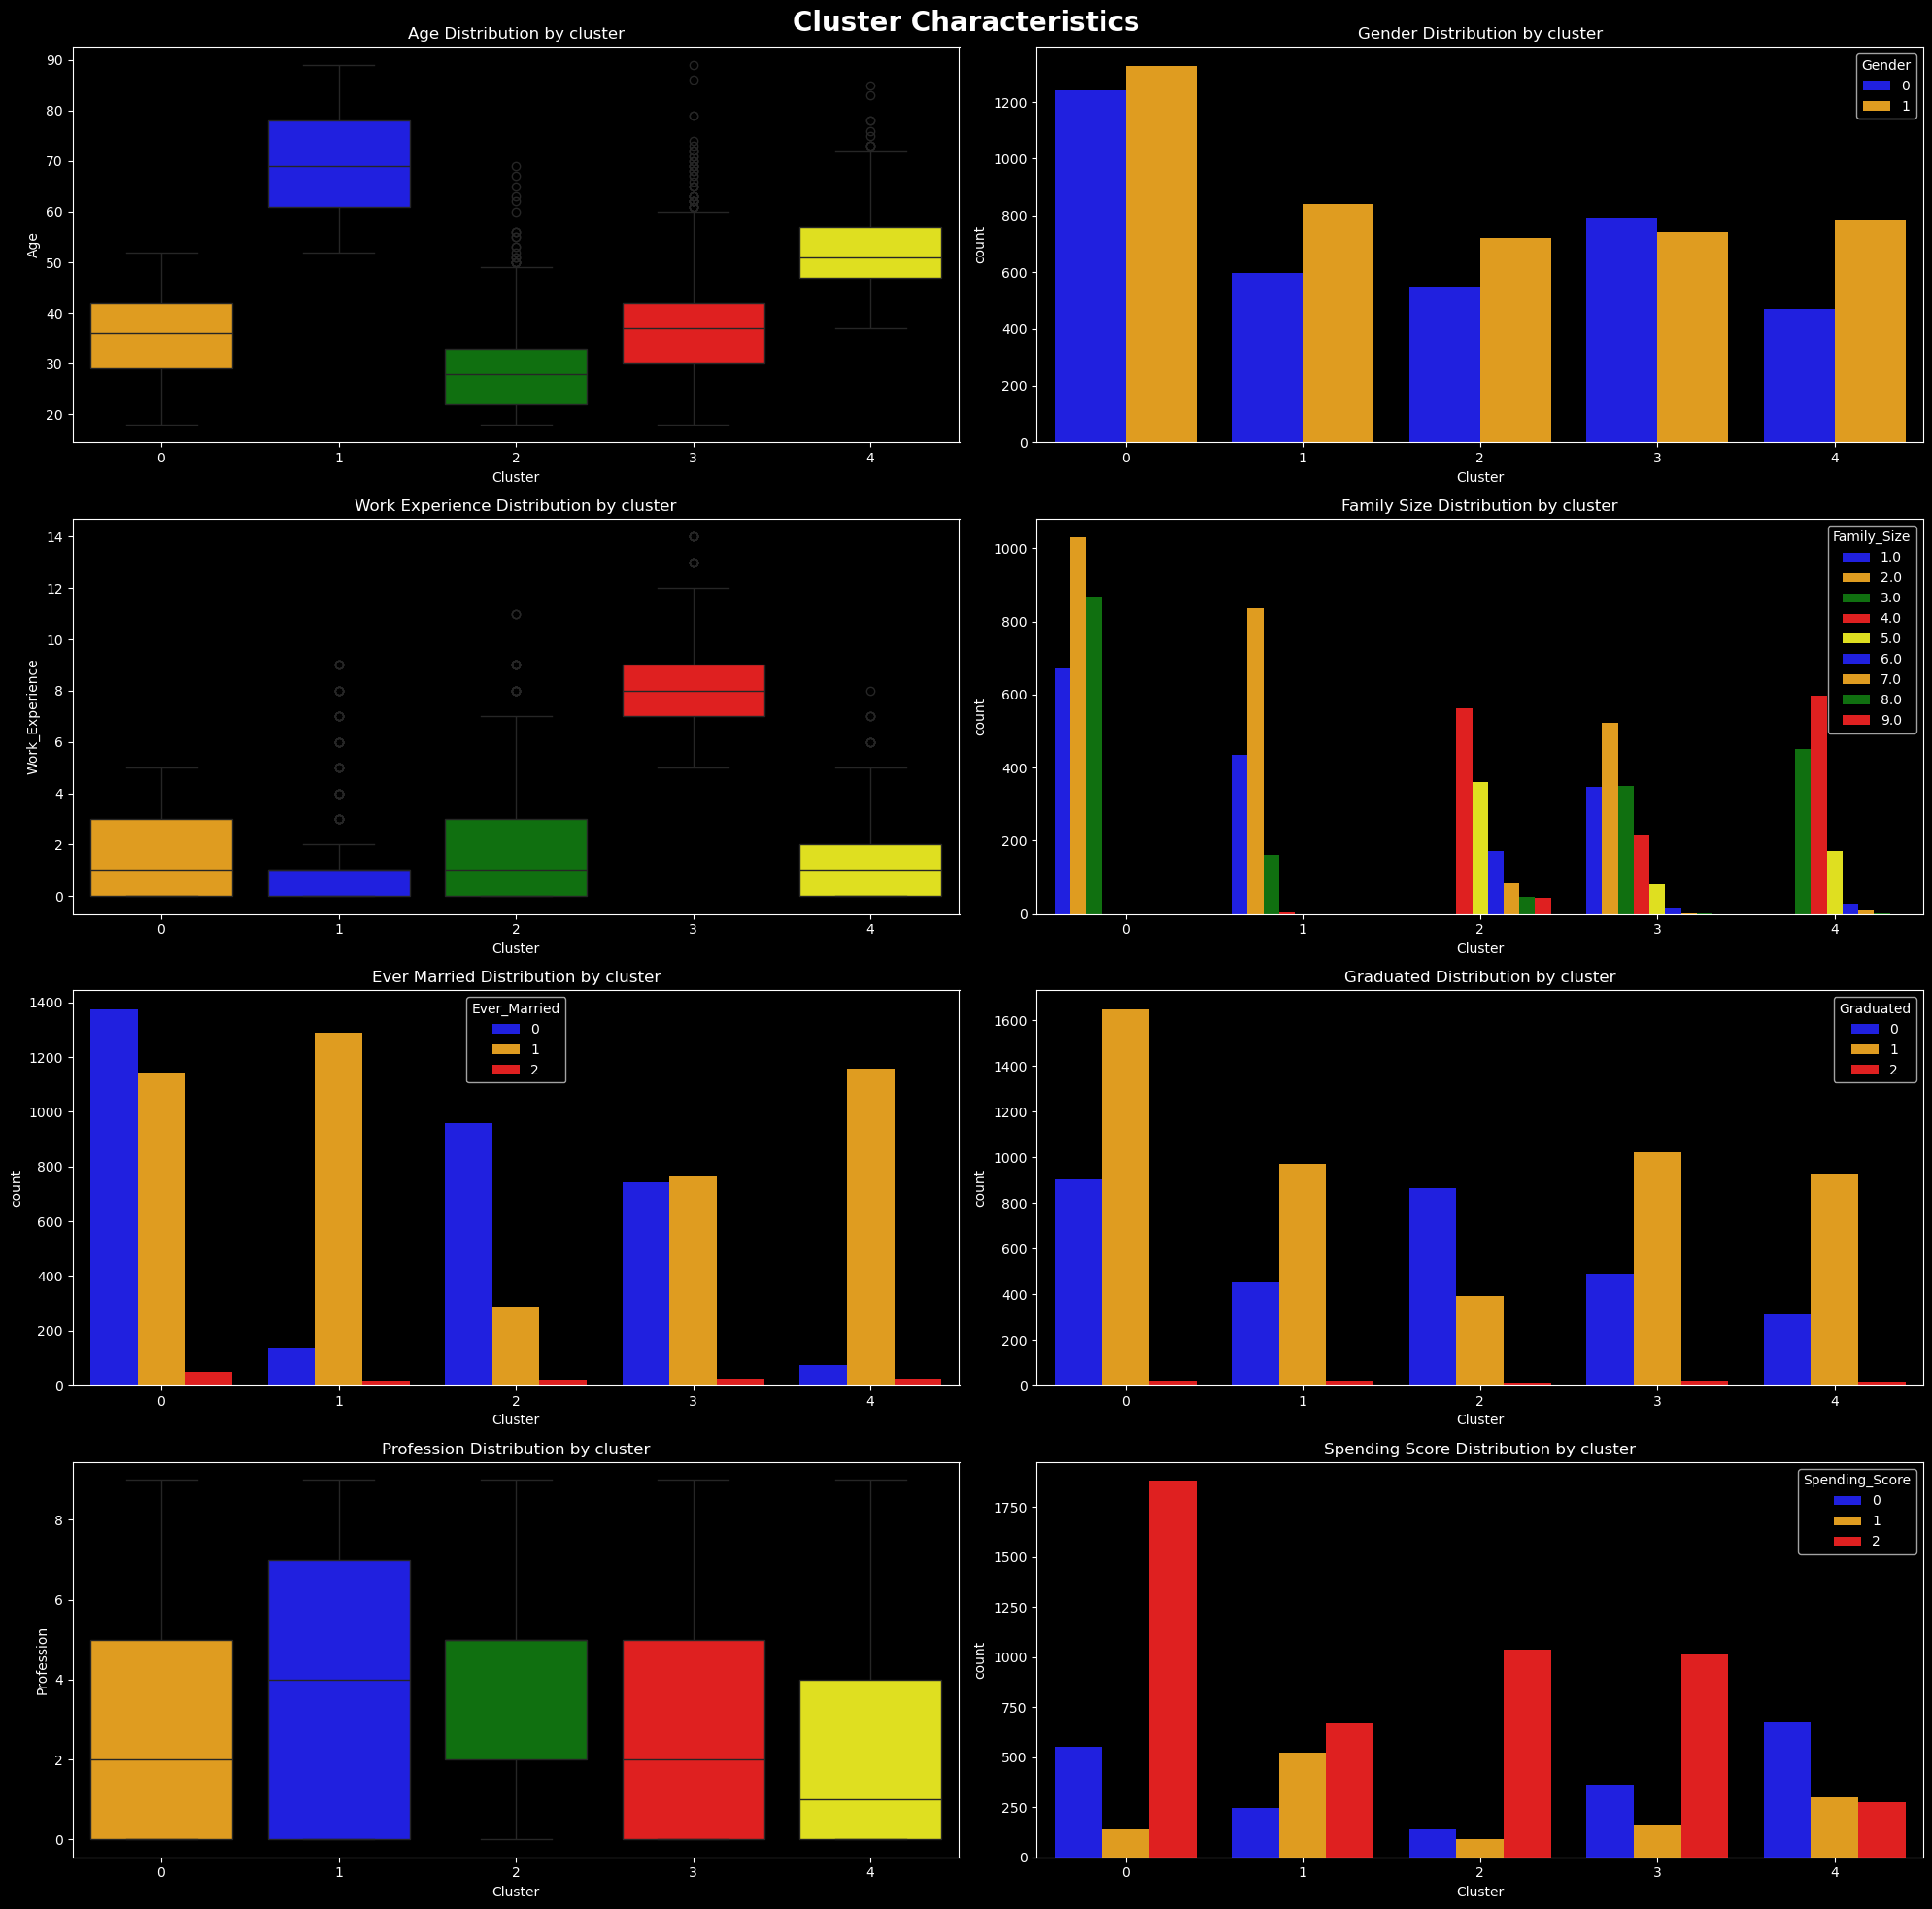

In [79]:
fig,axes=m.subplots(4,2,figsize=(20,20))
m.suptitle("Cluster Characteristics",fontsize=20,fontweight='bold')
s.boxplot(data=df,x='Cluster',y='Age',palette=['orange','blue','green','red','yellow'],ax=axes[0,0])
axes[0,0].set_title('Age Distribution by cluster')
s.countplot(data=df,x='Cluster',hue='Gender',palette=['blue','orange'],ax=axes[0,1])
axes[0,1].set_title('Gender Distribution by cluster')
s.boxplot(data=df,x='Cluster',y='Work_Experience',palette=['orange','blue','green','red','yellow'],ax=axes[1,0])
axes[1,0].set_title('Work Experience Distribution by cluster')
s.countplot(data=df,x='Cluster',hue='Family_Size',palette=['blue','orange','green','red','yellow'],ax=axes[1,1])
axes[1,1].set_title('Family Size Distribution by cluster')
s.countplot(data=df,x='Cluster',hue='Ever_Married',palette=['blue','orange','red'],ax=axes[2,0])
axes[2,0].set_title('Ever Married Distribution by cluster')
s.countplot(data=df,x='Cluster',hue='Graduated',palette=['blue','orange','red'],ax=axes[2,1])
axes[2,1].set_title('Graduated Distribution by cluster')
s.boxplot(data=df,x='Cluster',y='Profession',palette=['orange','blue','green','red','yellow'],ax=axes[3,0])
axes[3,0].set_title('Profession Distribution by cluster')
s.countplot(data=df,x='Cluster',hue='Spending_Score',palette=['blue','orange','red'],ax=axes[3,1])
axes[3,1].set_title('Spending Score Distribution by cluster')
m.tight_layout()
m.show()

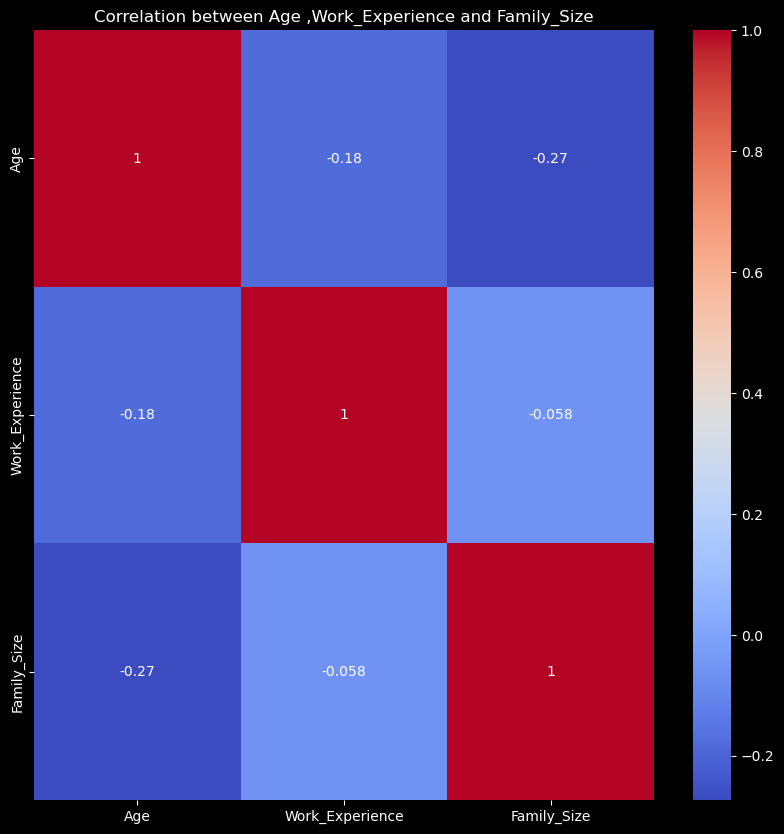

In [80]:
numeric_columns=['Age','Work_Experience','Family_Size']
m.figure(figsize=(10,10))
s.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')
m.title('Correlation between Age ,Work_Experience and Family_Size')
m.show()

## Clusters:-

In [81]:
m.style.use('dark_background')

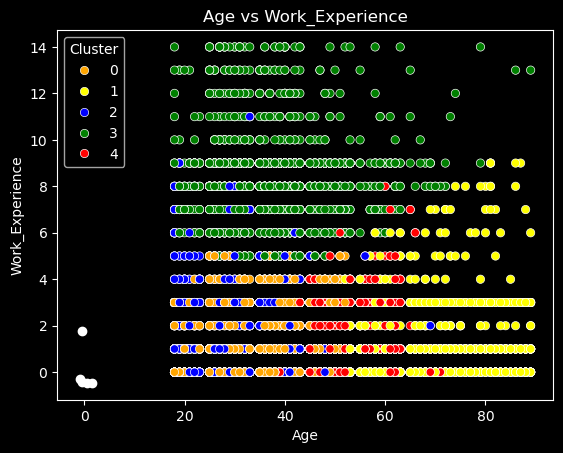

In [82]:
s.scatterplot(data=df,x=df['Age'],y=df['Work_Experience'],hue='Cluster',palette=['orange','yellow','blue','green','red'])
m.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='white')
m.title('Age vs Work_Experience')
m.show()

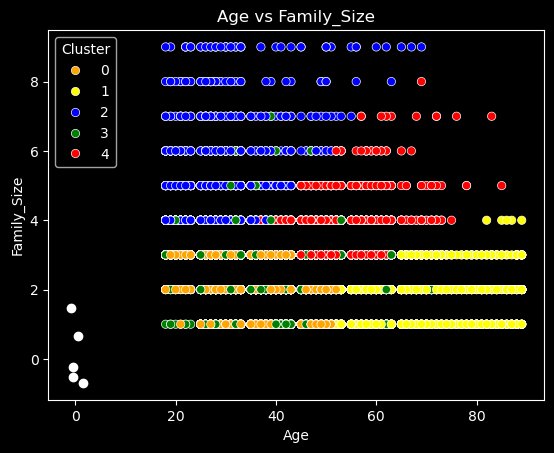

In [83]:
s.scatterplot(data=df,x=df['Age'],y=df['Family_Size'],hue='Cluster',palette=['orange','yellow','blue','green','red'])
m.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],color='white')
m.title('Age vs Family_Size')
m.show()

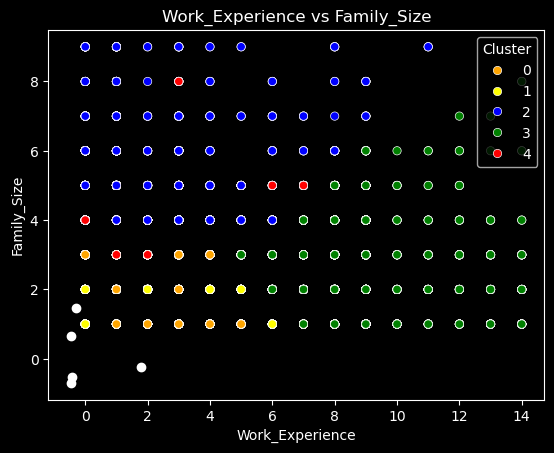

In [84]:
s.scatterplot(data=df,x=df['Work_Experience'],y=df['Family_Size'],hue='Cluster',palette=['orange','yellow','blue','green','red'])
m.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='white')
m.title('Work_Experience vs Family_Size')
m.show()

## Performance of Clusters:-

In [85]:
numeric_columns=['Age','Work_Experience','Family_Size']
#dv=davies_bouldin_score(df[numeric_columns],kmeans.labels_)
dv=davies_bouldin_score(x_scaled,kmeans.labels_)
print(dv)

0.9775980654076599


In [86]:
#sl=silhouette_score(df[numeric_columns],kmeans.labels_)
sl=silhouette_score(x_scaled,kmeans.labels_)
print(sl)

0.3382146254076763


In [87]:
import joblib

# Assuming `scaler` is your StandardScaler and `kmeans` is your KMeans model
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

[1 1 3 ... 1 1 1]


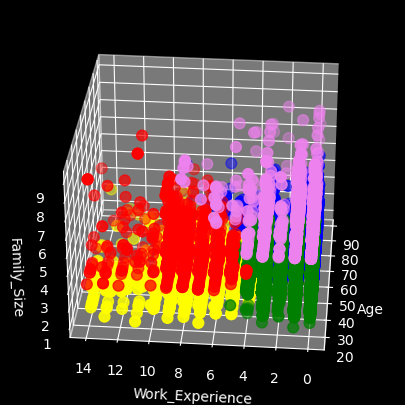

In [88]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x_scaled)
df['Label']=label
print(label)

from mpl_toolkits.mplot3d import Axes3D
fig=m.figure(figsize=(20,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.Label==0],df['Work_Experience'][df.Label==0],df['Family_Size'][df.Label==0],c='yellow',s=60)
ax.scatter(df.Age[df.Label==1],df['Work_Experience'][df.Label==1],df['Family_Size'][df.Label==1],c='green',s=60)
ax.scatter(df.Age[df.Label==2],df['Work_Experience'][df.Label==2],df['Family_Size'][df.Label==2],c='red',s=60)
ax.scatter(df.Age[df.Label==3],df['Work_Experience'][df.Label==3],df['Family_Size'][df.Label==3],c='blue',s=60)
ax.scatter(df.Age[df.Label==4],df['Work_Experience'][df.Label==4],df['Family_Size'][df.Label==4],c='violet',s=60)
ax.view_init(30,185)
m.xlabel('Age')
m.ylabel('Work_Experience')
ax.set_zlabel('Family_Size')
m.show()